## Exploratory Data Analysis (EDA) for Water Distribution Networks (WDNs)

### 1. Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import networkx as nx
from sklearn.cluster import KMeans

### 2. Load Datasets

In [2]:
# Load water quality data
water_quality = pd.read_csv("/home/rguktrkvalley/Desktop/WDN/water_quality_data.csv")

# Load water network nodes and edges
nodes = pd.read_csv("/home/rguktrkvalley/Desktop/WDN/wdn_synthetic_nodes.csv")
edges = pd.read_csv("/home/rguktrkvalley/Desktop/WDN/wdn_synthetic_edges.csv")


### 3. Summary Statistics and Data Overview

#### a. Water Quality Data (Contaminant Detection)

In [3]:
water_quality.columns

Index(['Timestamp', 'pH', 'Turbidity (NTU)', 'Chlorine (mg/L)',
       'Contamination_Flag'],
      dtype='object')

In [4]:
water_quality.head()

,Timestamp,pH,Turbidity (NTU),Chlorine (mg/L),Contamination_Flag
0,2024-01-01 00:00:00,7.248357,1.463089,1.079871,0
1,2024-01-01 01:00:00,6.930868,1.954708,0.984927,1
2,2024-01-01 02:00:00,7.323844,0.300716,0.811926,0
3,2024-01-01 03:00:00,7.761515,1.281485,0.670613,1
4,2024-01-01 04:00:00,6.882923,0.674679,0.939645,0


In [5]:
water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           500 non-null    object 
 1   pH                  500 non-null    float64
 2   Turbidity (NTU)     500 non-null    float64
 3   Chlorine (mg/L)     500 non-null    float64
 4   Contamination_Flag  501 non-null    object 
dtypes: float64(3), object(2)
memory usage: 19.8+ KB


In [6]:
water_quality.describe()

,pH,Turbidity (NTU),Chlorine (mg/L)
count,500.000000,500.000000,500.000000
mean,7.003419,1.015913,0.821697
std,0.490627,0.488999,0.202049
min,5.379366,-0.348443,0.220749
25%,6.649846,0.702354,0.679514
50%,7.006399,1.014266,0.823961
75%,7.318392,1.325621,0.950948
max,8.926366,2.316191,1.320337


#### Plot Distribution of Water Quality Parameters

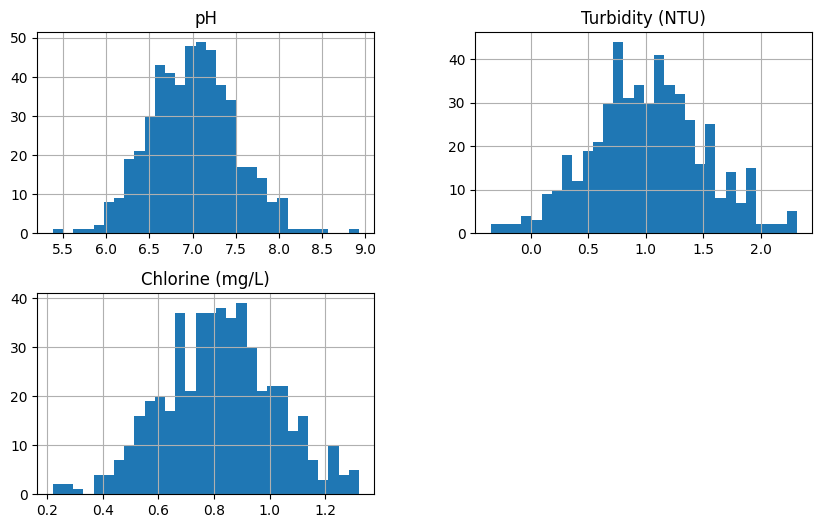

In [7]:
water_quality.hist(figsize=(10,6), bins=30)
plt.show()


#### Detect Anomalies Using Boxplots

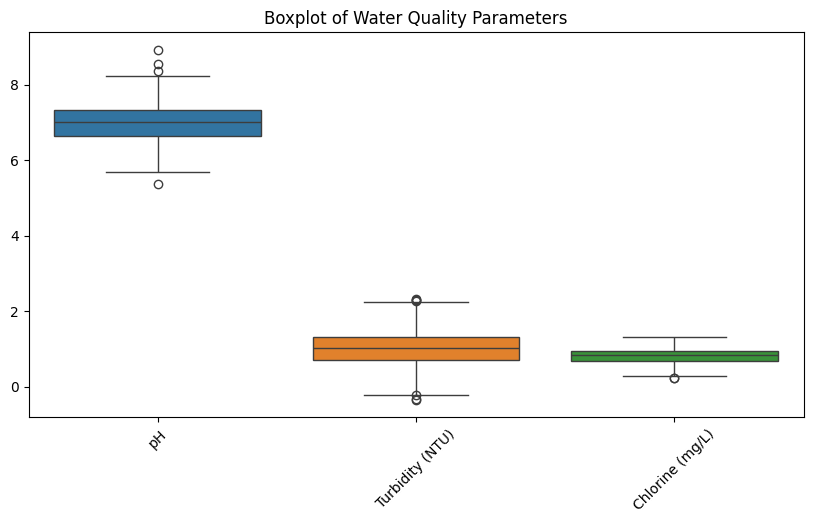

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(data=water_quality)
plt.xticks(rotation=45)
plt.title("Boxplot of Water Quality Parameters")
plt.show()


### b. Network Structure (Graph Visualization)

#### Load Nodes and Edges into a Graph

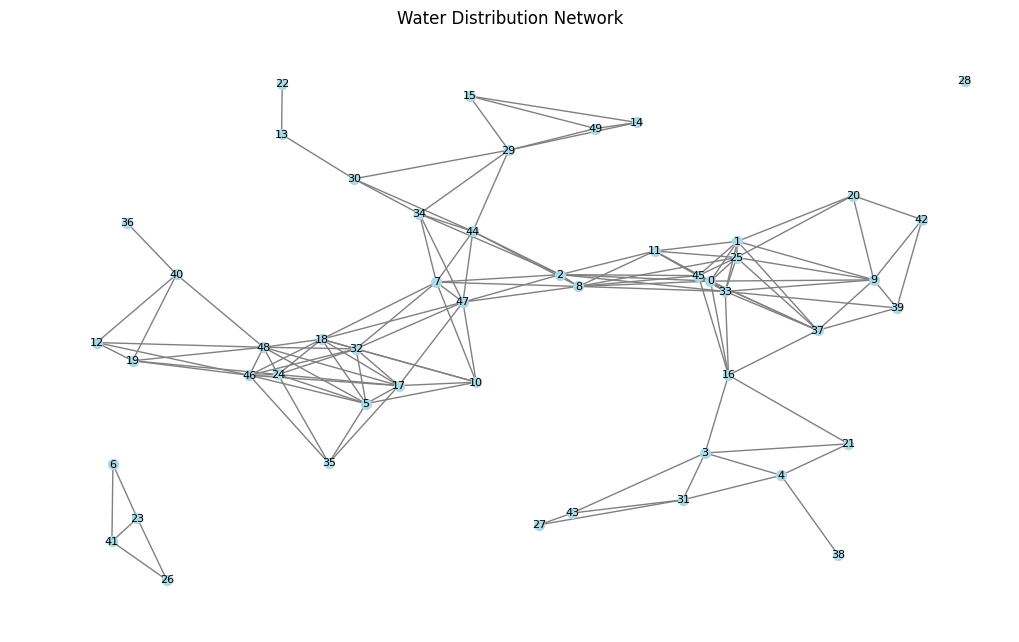

In [9]:
# Convert nodes and edges into a graph
G = nx.Graph()
for _, row in nodes.iterrows():
    G.add_node(row["Node_ID"], pos=(row["Longitude"], row["Latitude"]))

for _, row in edges.iterrows():
    G.add_edge(row["Start_Node"], row["End_Node"], weight=row["Pipe_Length (m)"])

# Draw the water distribution network
plt.figure(figsize=(10,6))
nx.draw(G, pos=nx.get_node_attributes(G, 'pos'), with_labels=True, node_color='lightblue', edge_color='gray', node_size=50, font_size=8)
plt.title("Water Distribution Network")
plt.show()


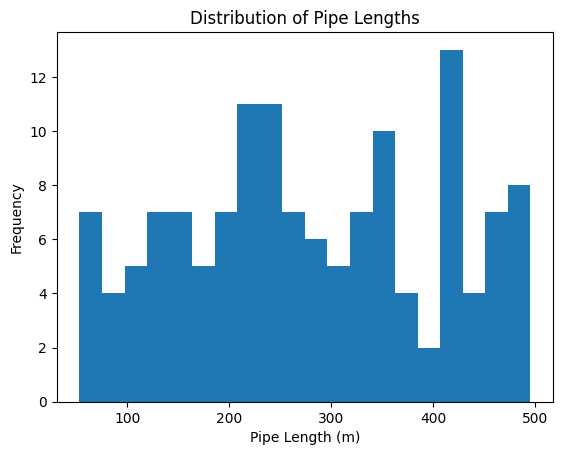

In [10]:
plt.hist(edges["Pipe_Length (m)"], bins=20)
plt.title("Distribution of Pipe Lengths")
plt.xlabel("Pipe Length (m)")
plt.ylabel("Frequency")
plt.show()


### 4. Anomaly Detection in Water Quality Data (GANs Preprocessing)

In [11]:
outliers = water_quality[(water_quality["pH"] < 6.5) | (water_quality["pH"] > 7.5)]
outliers


,Timestamp,pH,Turbidity (NTU),Chlorine (mg/L),Contamination_Flag
3,2024-01-01 03:00:00,7.761515,1.281485,0.670613,1
6,2024-01-01 06:00:00,7.789606,0.703803,0.979039,1
13,2024-01-01 13:00:00,6.043360,0.546218,0.662162,1
14,2024-01-01 14:00:00,6.137541,0.711614,1.147193,1
16,2024-01-01 16:00:00,6.493584,1.250459,0.669716,1
...,...,...,...,...,...
488,2024-01-21 08:00:00,7.843571,0.889518,0.494869,1
491,2024-01-21 11:00:00,7.739972,-0.020867,1.311640,1
494,2024-01-21 14:00:00,7.761562,0.499190,1.108422,1
496,2024-01-21 16:00:00,6.481377,1.898843,1.212301,1


### 5. Graph Representation Learning for Network Reconstruction (GNNs Preprocessing)

##### Convert node data into a graph-compatible format for GNNs:

In [12]:
import torch
from torch_geometric.data import Data

# Convert nodes to tensor
node_features = torch.tensor(nodes[["Latitude", "Longitude"]].values, dtype=torch.float)
edge_index = torch.tensor(edges[["Start_Node", "End_Node"]].values.T, dtype=torch.long)

# Create PyTorch Geometric graph
graph_data = Data(x=node_features, edge_index=edge_index)
print(graph_data)


/home/rguktrkvalley/.local/lib/python3.8/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /home/rguktrkvalley/.local/lib/python3.8/site-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/rguktrkvalley/.local/lib/python3.8/site-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /home/rguktrkvalley/.local/lib/python3.8/site-packages/torch_cluster/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/home/rguktrkvalley/.local/lib/python3.8/site-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /home/rguktrkvalley/.local/lib/python

Data(x=[50, 2], edge_index=[2, 137])


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#### Normalizing numerical columns

In [14]:
scaler = MinMaxScaler()
water_quality[['pH', 'Turbidity (NTU)', 'Chlorine (mg/L)']] = scaler.fit_transform(water_quality[['pH', 'Turbidity (NTU)', 'Chlorine (mg/L)']])

# Save cleaned dataset
water_quality.to_csv("cleaned_water_quality.csv", index=False)

In [15]:
import joblib
joblib.dump(scaler, "wq_scaler.joblib")
print("Scaler saved as wq_scaler.joblib")

Scaler saved as wq_scaler.joblib


#### Preprocessing Network Data for GNN

In [16]:
# Convert Nodes & Edges into adjacency list format
edges["weight"] = edges["Pipe_Length (m)"]  # Rename length as weight for GNN

# Save processed files
nodes.to_csv("processed_nodes.csv", index=False)
edges.to_csv("processed_edges.csv", index=False)

print("Network Data Preprocessed and Saved!")


Network Data Preprocessed and Saved!


## Random Forest Classifier for contamination detection

#### Import Libraries & Load Data

In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

#### Load dataset and data preprocessing 

In [18]:
# Load dataset
df = pd.read_csv("/home/rguktrkvalley/Desktop/WDN/cleaned_water_quality.csv")

# Drop non-numeric column if exists
df = df.drop(columns=["Timestamp"], errors='ignore')

# Check NaNs in the target variable y before processing
print("NaNs in y before cleaning:", df["Contamination_Flag"].isna().sum())

# Drop rows with missing target values in Contamination_Flag
df = df.dropna(subset=["Contamination_Flag"])

# Separate features and target
X = df.drop(columns=["Contamination_Flag"])
y = df["Contamination_Flag"]

# Ensure both X and y have the same length after cleaning
print("Rows in X:", len(X))
print("Rows in y:", len(y))

# Check NaNs in the target variable y after cleaning
print("NaNs in y after cleaning:", y.isna().sum())

# Convert all columns to numeric, coerce errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Check if y still has NaNs (should be 0)
print("NaNs in y after numeric conversion:", y.isna().sum())

# Check if there are any NaNs in the features
print("NaNs in feature columns before processing:\n", X.isna().sum())

# Drop rows with NaN in features (optional, depending on your use case)
X = X.dropna()

# Ensure X and y are aligned after dropping rows with NaN values
y = y[X.index]  # Align y with X after dropping rows with NaN values

# Check if there are any NaNs left in features after dropping
print("NaNs in feature columns after dropping rows with NaNs:\n", X.isna().sum())

NaNs in y before cleaning: 3
Rows in X: 501
Rows in y: 501
NaNs in y after cleaning: 0
NaNs in y after numeric conversion: 0
NaNs in feature columns before processing:
 pH                 1
Turbidity (NTU)    1
Chlorine (mg/L)    1
dtype: int64
NaNs in feature columns after dropping rows with NaNs:
 pH                 0
Turbidity (NTU)    0
Chlorine (mg/L)    0
dtype: int64


#### train the model

In [19]:
# Add random noise to features to reduce performance
noise_factor = 0.2
X_noisy = X + noise_factor * np.random.randn(*X.shape)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

# Create a pipeline with imputation and a less complex model
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Imputer to fill missing values with mean
    ("clf", RandomForestClassifier(n_estimators=10, max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('clf',
                 RandomForestClassifier(max_depth=3, min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=10,
                                        random_state=42))])

#### Evaluate the model

In [20]:
# Predict and evaluate
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for ROC-AUC

# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

# Check final accuracy
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.2f}")


[[52  8]
 [26 14]]
              precision    recall  f1-score   support

           0       0.67      0.87      0.75        60
           1       0.64      0.35      0.45        40

    accuracy                           0.66       100
   macro avg       0.65      0.61      0.60       100
weighted avg       0.65      0.66      0.63       100

ROC-AUC: 0.63
Accuracy: 0.66


In [21]:
import joblib
joblib.dump(pipeline, "rf_model.joblib")
print("Model pipeline saved as rf_model.joblib")

Model pipeline saved as rf_model.joblib


## Train and Evaluate a GNN to predict missing connections in the water distribution network. 

#### import required libraries

In [22]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import pandas as pd
import numpy as np
import random
from sklearn.metrics import roc_auc_score, accuracy_score
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


#### load node and edge data

In [23]:
# Load processed node and edge data
df_nodes = pd.read_csv("/home/rguktrkvalley/Desktop/WDN/processed_nodes.csv")
df_edges = pd.read_csv("/home/rguktrkvalley/Desktop/WDN/processed_edges.csv")

#### define gnn model

In [24]:
# Create edge index
edge_index = torch.tensor(df_edges[['Start_Node', 'End_Node']].values.T, dtype=torch.long)
node_features = torch.tensor(df_nodes[['Latitude', 'Longitude']].values, dtype=torch.float32)

# Create graph
graph_data = Data(x=node_features, edge_index=edge_index)

# Define GNN Model
class GNNModel(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, embedding_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, embedding_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Edge predictor (MLP after embeddings)
class EdgePredictor(torch.nn.Module):
    def __init__(self, embedding_dim):
        super(EdgePredictor, self).__init__()
        self.linear = nn.Linear(embedding_dim * 2, 1)

    def forward(self, src_emb, dst_emb):
        edge_emb = torch.cat([src_emb, dst_emb], dim=1)
        return self.linear(edge_emb)


#### train gnn model

In [25]:
# Define model hyperparameters
input_dim = graph_data.x.shape[1]
hidden_dim = 32
embedding_dim = 16

gnn_model = GNNModel(input_dim, hidden_dim, embedding_dim)
edge_predictor = EdgePredictor(embedding_dim)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
gnn_model = gnn_model.to(device)
edge_predictor = edge_predictor.to(device)
graph_data = graph_data.to(device)

optimizer = torch.optim.Adam(list(gnn_model.parameters()) + list(edge_predictor.parameters()), lr=0.01)
criterion = nn.BCEWithLogitsLoss()

# Prepare positive edges (existing)
positive_edges = edge_index.t()

# Prepare negative edges (non-existing)
def generate_negative_edges(num_samples, num_nodes, existing_edges_set):
    neg_edges = []
    while len(neg_edges) < num_samples:
        src, dst = random.randint(0, num_nodes - 1), random.randint(0, num_nodes - 1)
        if src != dst and (src, dst) not in existing_edges_set and (dst, src) not in existing_edges_set:
            neg_edges.append([src, dst])
    return torch.tensor(neg_edges, dtype=torch.long)

# Train function
def train(epochs=100):
    num_nodes = graph_data.num_nodes
    existing_edges_set = set([tuple(edge) for edge in positive_edges.tolist()])

    for epoch in range(epochs):
        gnn_model.train()
        edge_predictor.train()
        
        optimizer.zero_grad()
        
        node_embeddings = gnn_model(graph_data.x, graph_data.edge_index)

        # Sample negative edges
        negative_edges = generate_negative_edges(positive_edges.size(0), num_nodes, existing_edges_set)

        # Positive edge predictions
        pos_src = node_embeddings[positive_edges[:, 0]]
        pos_dst = node_embeddings[positive_edges[:, 1]]
        pos_pred = edge_predictor(pos_src, pos_dst).squeeze()

        # Negative edge predictions
        neg_src = node_embeddings[negative_edges[:, 0]]
        neg_dst = node_embeddings[negative_edges[:, 1]]
        neg_pred = edge_predictor(neg_src, neg_dst).squeeze()

        preds = torch.cat([pos_pred, neg_pred])
        labels = torch.cat([torch.ones(pos_pred.size(0)), torch.zeros(neg_pred.size(0))]).to(device)
        

        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            with torch.no_grad():
                pred_labels = (torch.sigmoid(preds) > 0.5).float()
                acc = (pred_labels == labels).sum().item() / labels.size(0)
                print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

# Train the model
train(epochs=200)


Epoch 0, Loss: 5.4228, Accuracy: 0.5000
Epoch 10, Loss: 1.2704, Accuracy: 0.4818
Epoch 20, Loss: 0.7717, Accuracy: 0.5146
Epoch 30, Loss: 0.6154, Accuracy: 0.6971
Epoch 40, Loss: 0.5940, Accuracy: 0.7190
Epoch 50, Loss: 0.6138, Accuracy: 0.6642
Epoch 60, Loss: 0.6058, Accuracy: 0.6715
Epoch 70, Loss: 0.6065, Accuracy: 0.6934
Epoch 80, Loss: 0.6402, Accuracy: 0.6460
Epoch 90, Loss: 0.6089, Accuracy: 0.7044
Epoch 100, Loss: 0.6002, Accuracy: 0.6861
Epoch 110, Loss: 0.5896, Accuracy: 0.7117
Epoch 120, Loss: 0.5990, Accuracy: 0.6825
Epoch 130, Loss: 0.5891, Accuracy: 0.7190
Epoch 140, Loss: 0.6341, Accuracy: 0.6569
Epoch 150, Loss: 0.5848, Accuracy: 0.7080
Epoch 160, Loss: 0.6408, Accuracy: 0.6569
Epoch 170, Loss: 0.6140, Accuracy: 0.6715
Epoch 180, Loss: 0.6178, Accuracy: 0.6642
Epoch 190, Loss: 0.5838, Accuracy: 0.6788


#### Evaluate gnn model

In [26]:
# Evaluation
def evaluate():
    gnn_model.eval()
    edge_predictor.eval()

    with torch.no_grad():
        node_embeddings = gnn_model(graph_data.x, graph_data.edge_index)

        # Use the same number of positive and negative edges
        num_eval_edges = 50
        positive_sample = positive_edges[:num_eval_edges]
        negative_sample = generate_negative_edges(num_eval_edges, graph_data.num_nodes, set([tuple(edge) for edge in positive_edges.tolist()]))

        # Positive predictions
        pos_src = node_embeddings[positive_sample[:, 0]]
        pos_dst = node_embeddings[positive_sample[:, 1]]
        pos_scores = edge_predictor(pos_src, pos_dst).squeeze()

        # Negative predictions
        neg_src = node_embeddings[negative_sample[:, 0]]
        neg_dst = node_embeddings[negative_sample[:, 1]]
        neg_scores = edge_predictor(neg_src, neg_dst).squeeze()

        all_scores = torch.cat([pos_scores, neg_scores])
        all_labels = torch.cat([torch.ones(pos_scores.size(0)), torch.zeros(neg_scores.size(0))]).cpu().numpy()

        probs = torch.sigmoid(all_scores).cpu().numpy()
        preds = (probs > 0.5).astype(int)

        auc = roc_auc_score(all_labels, probs)
        acc = accuracy_score(all_labels, preds)

        print(f"\nEvaluation - AUC: {auc:.4f}, Accuracy: {acc:.4f}")

# Evaluate the model
evaluate()



Evaluation - AUC: 0.8088, Accuracy: 0.7400


### Network Visualization of contaminated nodes

Contaminated Nodes:
     Node_ID   Latitude  Longitude
45       45  60.701254  69.420146
3         3  26.522342  70.196564
35       35  24.570495  27.122095


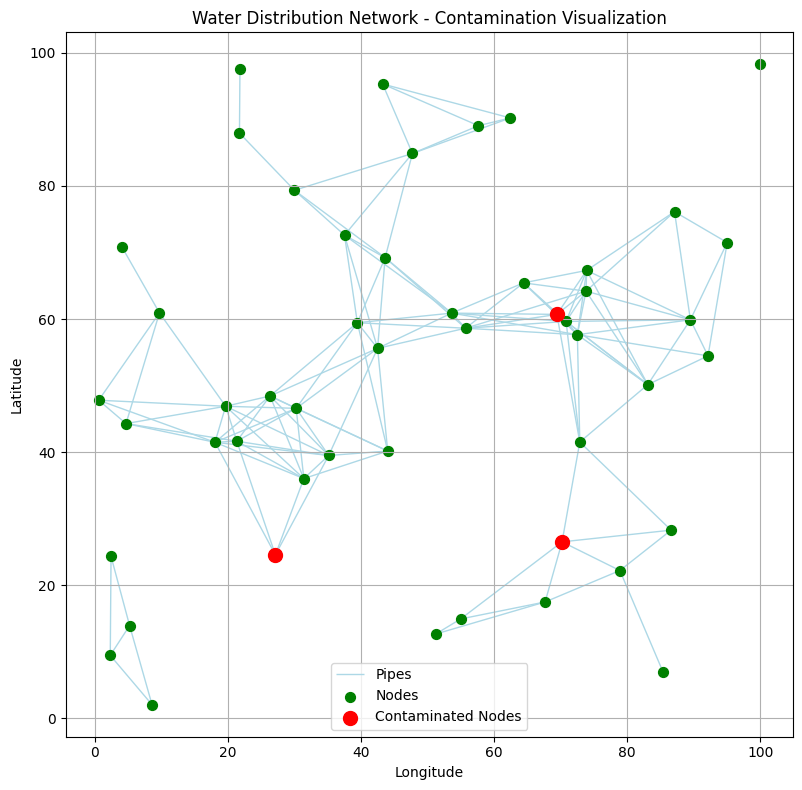

In [27]:

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString

# Convert nodes to GeoDataFrame
nodes['geometry'] = gpd.points_from_xy(nodes['Longitude'], nodes['Latitude'])
gdf_nodes = gpd.GeoDataFrame(nodes, geometry='geometry')

# Create edges using LineString from node coordinates
def edge_geometry(row):
    start = gdf_nodes[gdf_nodes['Node_ID'] == row['Start_Node']].iloc[0]
    end = gdf_nodes[gdf_nodes['Node_ID'] == row['End_Node']].iloc[0]
    return LineString([(start['Longitude'], start['Latitude']), (end['Longitude'], end['Latitude'])])

edges['geometry'] = edges.apply(edge_geometry, axis=1)
gdf_edges = gpd.GeoDataFrame(edges, geometry='geometry')

# Random sample for demo
contaminated_nodes = gdf_nodes.sample(n=min(3, len(gdf_nodes)))

# --- Plotting ---
fig, ax = plt.subplots(figsize=(12, 8))

# Pipes
gdf_edges.plot(ax=ax, color='lightblue', linewidth=1, label='Pipes', zorder=0)

# All Nodes
gdf_nodes.plot(ax=ax, color='green', markersize=50, label='Nodes', zorder=1)

# Contaminated Nodes on Top
contaminated_nodes.plot(ax=ax, color='red', markersize=100, label='Contaminated Nodes', zorder=2)

# Print & Label
print("Contaminated Nodes:\n", contaminated_nodes[['Node_ID', 'Latitude', 'Longitude']])
plt.title('Water Distribution Network - Contamination Visualization')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




#### Network Reconstruction

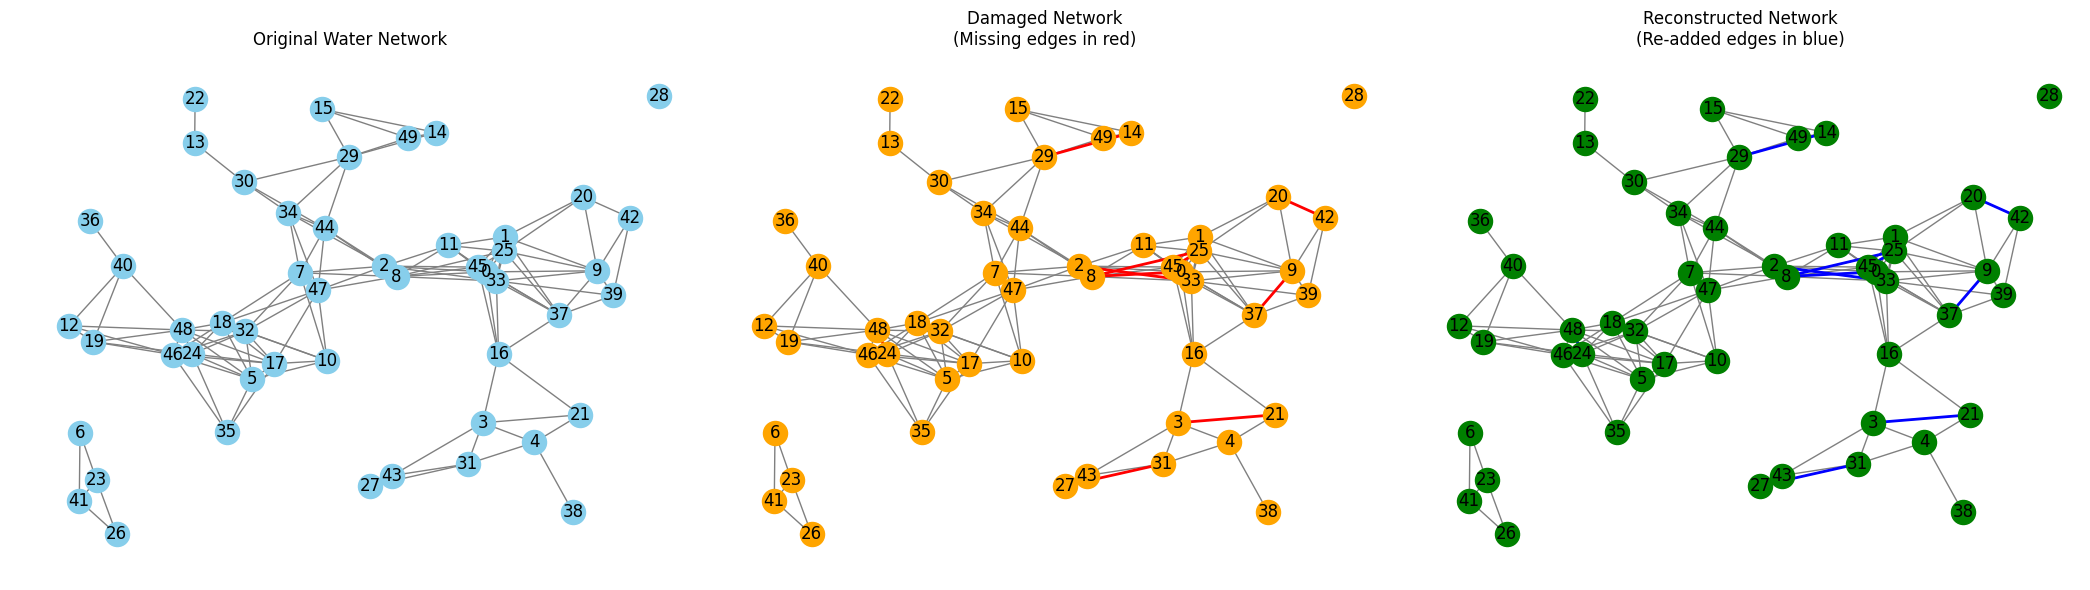

In [28]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random

# Load data
nodes_df = pd.read_csv("/home/rguktrkvalley/Desktop/WDN/wdn_synthetic_nodes.csv")
edges_df = pd.read_csv("/home/rguktrkvalley/Desktop/WDN/wdn_synthetic_edges.csv")

# Create original network
G_original = nx.Graph()
for _, row in nodes_df.iterrows():
    G_original.add_node(row["Node_ID"], pos=(row["Longitude"], row["Latitude"]))
for _, row in edges_df.iterrows():
    G_original.add_edge(row["Start_Node"], row["End_Node"])

# Damage the network by removing 10% of the edges
G_damaged = G_original.copy()
num_edges_to_remove = int(0.1 * G_damaged.number_of_edges())
edges_to_remove = random.sample(list(G_damaged.edges()), num_edges_to_remove)
G_damaged.remove_edges_from(edges_to_remove)

# Reconstruct the network by adding back the removed edges
G_reconstructed = G_damaged.copy()
G_reconstructed.add_edges_from(edges_to_remove)

# Positions for plotting
pos = nx.get_node_attributes(G_original, 'pos')

# Plot all three networks
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

# Plot Original Network
nx.draw(G_original, pos, with_labels=True, node_color="skyblue", edge_color="gray", ax=axs[0])
axs[0].set_title("Original Water Network")

# Plot Damaged Network - highlight missing edges in red
existing_edges = list(G_damaged.edges())
nx.draw(G_damaged, pos, with_labels=True, node_color="orange", edge_color="gray", ax=axs[1])
nx.draw_networkx_edges(G_original, pos, edgelist=edges_to_remove, edge_color='red', width=2, ax=axs[1])
axs[1].set_title("Damaged Network\n(Missing edges in red)")

# Plot Reconstructed Network - highlight added edges in blue
nx.draw(G_reconstructed, pos, with_labels=True, node_color="green", edge_color="gray", ax=axs[2])
nx.draw_networkx_edges(G_reconstructed, pos, edgelist=edges_to_remove, edge_color='blue', width=2, ax=axs[2])
axs[2].set_title("Reconstructed Network\n(Re-added edges in blue)")

plt.tight_layout()
plt.show()
